In [28]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import matplotlib.pyplot as plt
import torch
from functions import *
import scib_metrics

In [2]:
adata = sc.read(
    "data/Immune_ALL_hum_mou.h5ad"
)

In [5]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor="cell_ranger", batch_key="batch")
sc.tl.pca(adata, n_comps=30, use_highly_variable=True)
adata = adata[:, adata.var.highly_variable].copy()
adata.obsm["Unintegrated"] = adata.obsm["X_pca"]
scanoramaPredict(adata)

Found 4000 genes among all datasets
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.73170003e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 2.03016241e-01
  4.59418070e-03 2.33243968e-02 7.18840580e-02 2.58658483e-02
  1.37328340e-02 1.36363636e-02 1.32093933e-01]
 [0.00000000e+00 0.00000000e+00 5.50835566e-01 5.12820513e-02
  2.61512948e-02 0.00000000e+00 7.56715853e-04 1.27567292e-04
  0.00000000e+00 6.36942675e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.71040127e-01
  6.18152524e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00


In [6]:
adata.write_h5ad(filename="data/adataMou4.h5ad")

In [7]:
adata = anndata.read_h5ad(filename="data/adataMou4.h5ad")
adata

AnnData object with n_obs × n_vars = 97861 × 4000
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'species', 'study', 'tissue'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'pca'
    obsm: 'Scanorama', 'Unintegrated', 'X_pca'
    varm: 'PCs'
    layers: 'counts'

In [8]:
sdnormalAdata, vaeSD = trainModelBenchmark(adata.copy(), "sdnormal", max_epochs=200,log=True, logname="sd200epMouBench",early_stopping=True)

INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/sd200epMouBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [19:41<00:00,  5.59s/it, v_num=0, train_loss_step=1.27e+3, train_loss_epoch=1.64e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [19:41<00:00,  5.91s/it, v_num=0, train_loss_step=1.27e+3, train_loss_epoch=1.64e+3]


In [9]:
mogAdata, vaeMG = trainModelBenchmark(adata.copy(), "mixofgaus", max_epochs=200,log=True, logname="mog200epMouBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/mog200epMouBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 200/200: 100%|██████████| 200/200 [23:14<00:00,  6.40s/it, v_num=0, train_loss_step=1.61e+3, train_loss_epoch=1.64e+3]

`Trainer.fit` stopped: `max_epochs=200` reached.


Epoch 200/200: 100%|██████████| 200/200 [23:14<00:00,  6.97s/it, v_num=0, train_loss_step=1.61e+3, train_loss_epoch=1.64e+3]


In [10]:
vampAdata, vaeVP = trainModelBenchmark(adata.copy(), "vamp", max_epochs = 200,log=True,logname="vampsd200epMouBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/vampsd200epMouBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 194/200:  97%|█████████▋| 194/200 [23:02<00:42,  7.13s/it, v_num=0, train_loss_step=2.49e+3, train_loss_epoch=1.64e+3]
Monitored metric elbo_validation did not improve in the last 45 records. Best score: 1654.485. Signaling Trainer to stop.


In [11]:
flowAdata, vaeNF = trainModelBenchmark(adata.copy(), 'normalflow', max_epochs=100, log=True, logname="flow100epMouBench",early_stopping=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: lightning_logs/flow100epMouBench
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 100/100: 100%|██████████| 100/100 [52:53<00:00, 28.00s/it, v_num=0, train_loss_step=1.52e+3, train_loss_epoch=1.64e+3]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [52:54<00:00, 31.74s/it, v_num=0, train_loss_step=1.52e+3, train_loss_epoch=1.64e+3]


In [13]:
allAdata = sdnormalAdata.copy()
allAdata.obsm["scVISD"] = sdnormalAdata.obsm["scVI"]
allAdata.obsm["scVIMG"] = mogAdata.obsm["scVI"]
allAdata.obsm["scVIVAMP"] = vampAdata.obsm["scVI"]
allAdata.obsm["scVINF"] = flowAdata.obsm["scVI"]

In [14]:
plotBenchmarkResults(allAdata,keys = ["Unintegrated","Scanorama","scVISD","scVIMG","scVIVAMP","scVINF"],label_key="final_annotation")

Embeddings:   0%|          | 0/6 [00:00<?, ?it/s]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.39853960275650024


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings:  17%|█▋        | 1/6 [02:20<11:42, 140.50s/it]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.49366109212860465


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings:  33%|███▎      | 2/6 [24:29<55:57, 839.48s/it]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.4258524030447006


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings:  50%|█████     | 3/6 [26:36<25:42, 514.06s/it]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.38777443021535873


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings:  67%|██████▋   | 4/6 [28:43<12:02, 361.49s/it]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.3756677806377411


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings:  83%|████████▎ | 5/6 [30:48<04:36, 276.20s/it]INFO:root:isolated labels: no more than 1 batches per label
INFO:root:T cells: 0.4039226770401001


INFO     T cells consists of a single batch or is too small. Skip.                                                 


Embeddings: 100%|██████████| 6/6 [32:54<00:00, 329.09s/it]


In [12]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6006 (pid 1342), started 1:50:59 ago. (Use '!kill 1342' to kill it.)

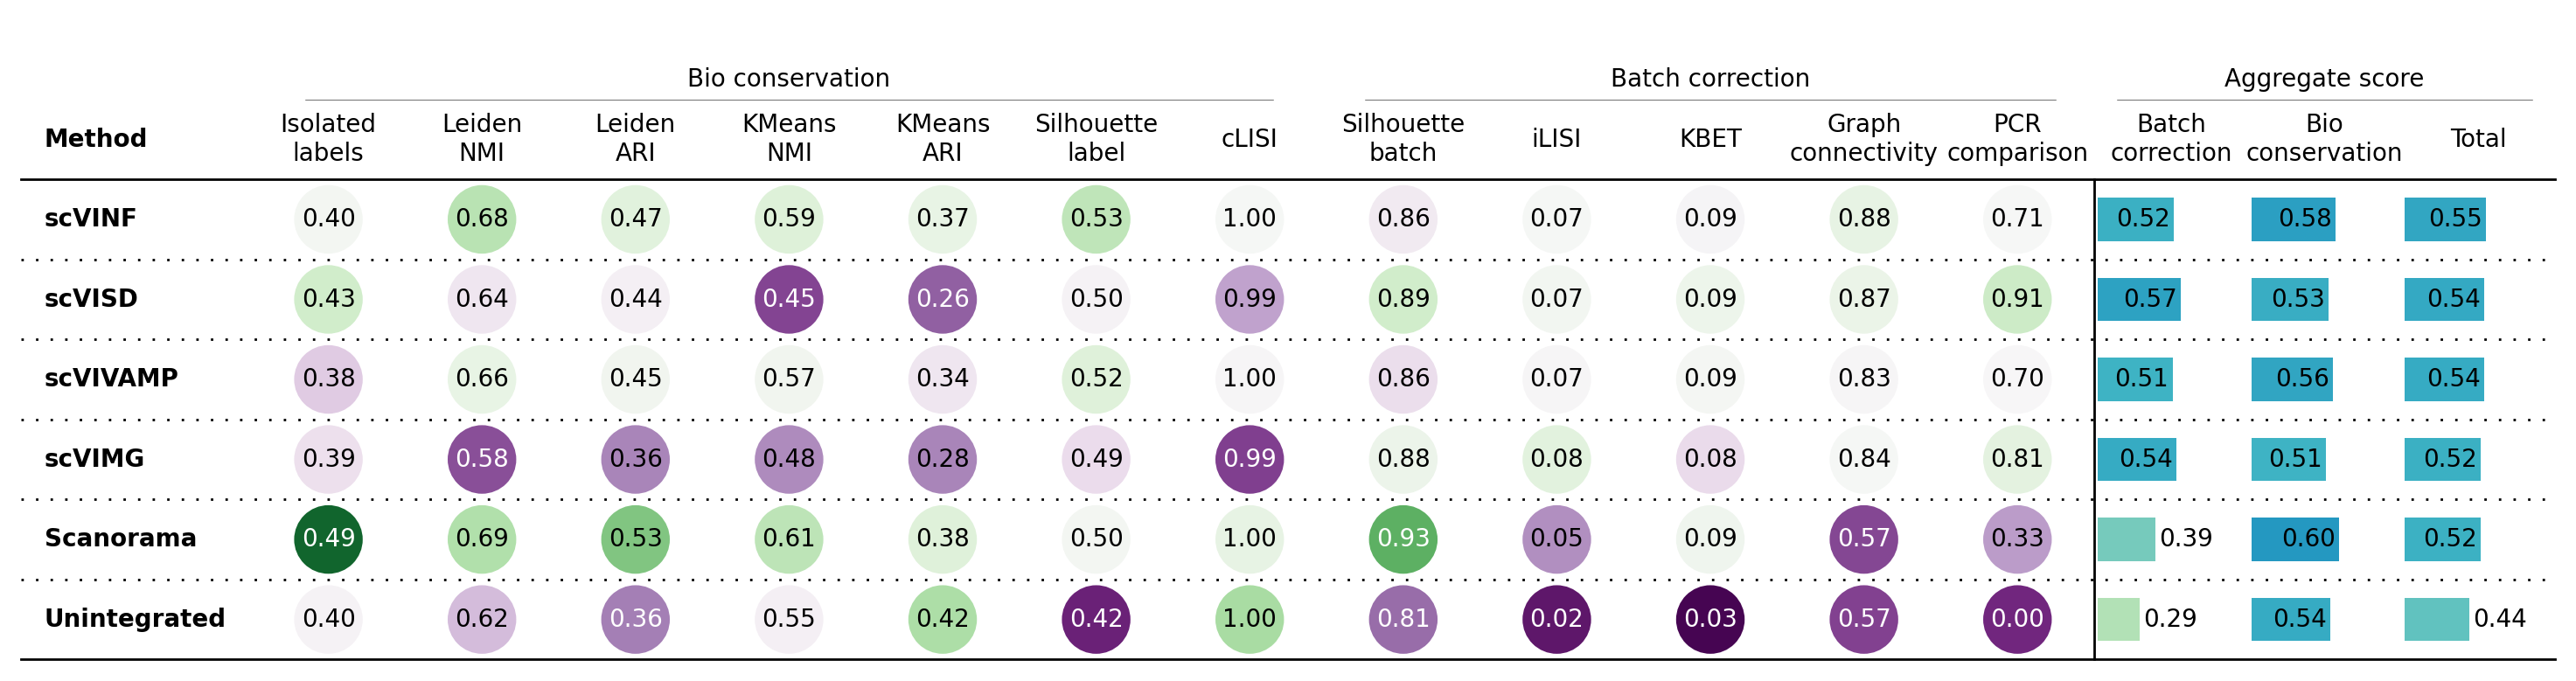

In [31]:

plt.show()